In [3]:
# Initialize Otter
import otter
grader = otter.Notebook("lab05.ipynb")

<table style="width: 100%;" id="nb-header">
    <tr style="background-color: transparent;"><td>
        <img src="https://data-88e.github.io/assets/images/blue_text.png" width="250px" style="margin-left: 0;" />
    </td><td>
        <p style="text-align: right; font-size: 10pt;"><strong>Economic Models</strong>, Fall 2023<br>
            Dr. Eric Van Dusen <br>
        Akhil Venkatesh <br>
</table>

In [4]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
# We import scipy later in the lab
%matplotlib inline

<!-- BEGIN QUESTION -->

# Lab 5: Utility & LaTeX

<!-- END QUESTION -->

## Part 1: Using LaTeX and Markdown
It's time to learn something new! You've seen a bit of LaTeX and markdown in lecture, now let's complete some of these exercises. Type out the following mathematical expressions in LaTeX, and use markdown to format the headings and tables. Google is your friend!

If you get stuck, check out the LaTeX Guide: https://math.hws.edu/gassert/LaTeX_Guide_Title.pdf!

**Question 1.1:** Quadratic Formula

![quadratic formula](quadratic_formula.png)

**Try it out!**
$$
\frac{-b\pm \sqrt{b^2-4ac}}{2a}
$$

**Question 1.2:** Partial Derivative

![partial derivative](partial_derivative.png)

**Try it out!**
$$
\frac{\partial u}{\partial x}=\frac{1}{2}x^{20}+\ln{3}-\pi
$$

**Question 1.3:** Integral

![integral](integral.png)

**Try it out!**
$$
\int_{-\infty}^{\infty} xp(x) \text{d}x
$$

**Question 1.4:** Simplify in Steps using Align

![align](align.png)

**Try it out!**
$$
\begin{aligned}
(x+1)(x-1) & = x^2+x-x+1 \\
 & = x^2+1
\end{aligned}
$$

**Question 1.5:** Lagrangian Multiplier

![lagrangian multiplier](lagrangian.png)

**Try it out!**
$$
\textit{L}(x,\lambda)=f(x)-\lambda g(x)
$$

**Question 1.6:** Headings

![headings](headings.png)

**Try it out!**

# Heading 1
## Heading 2
### Heading 3
#### Heading 4
##### Heading 5
###### Heading 6


**Question 1.7:** Table

![table](table.png)

**Try it out!**

|Vegetable|Comments|Weight|
|------|------|------|
|Carrots|Good early crop, then carrot fly.|7kg|
|Lettuce|Slow to start, then bolted.|1kg|
|French beans|Excellent.|12kg|


**Question 1.8:** Limit <br>
Hint: https://tex.stackexchange.com/questions/74969/how-to-make-the-limit-mathematics-sign

![limit](limit.png)

**Try it out!**
$$
h_i(t)=\lim_{\epsilon \to 0} \frac{1}{\epsilon}\frac{\textsf{P}(t<T_i\leqslant t+\epsilon)}{\textsf{P}(T_i>t)}
$$

## Part 2: Optimization, Utility Equations, Marginal Utility

### What is Optimization?

Optimization is the branch of mathematics focused on finding extreme values (max or min) of
functions.

Optimization tools appear in many places such as:

- Building economic models in which individuals make decisions that maximize their utility.  
- Building statistical models and maximizing the fit of these models by optimizing certain fit
  functions.  

### Derivatives and Optima

If you have already taken calculus, this should be familiar to you. If not, no worries!

Consider function $ f(x) $ which maps a number into another number. We can say that any point
where $ f'(x) = 0 $ is a local extremum of $ f $.

Let’s work through an example. Consider the function

$$
f(x) = x^4 - 3 x^2
$$

Its derivative is given by

$$
\frac{\partial f}{\partial x} = 4 x^3 - 6 x
$$

Let’s plot the function and its derivative to pick out the local extremum by hand.

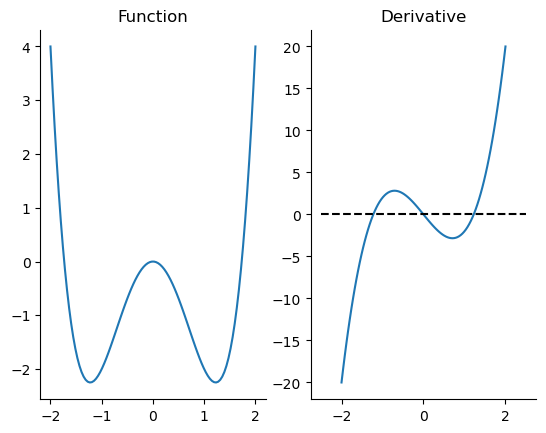

In [5]:
def f(x):
    return x**4 - 3*x**2


def fp(x):
    return 4*x**3 - 6*x

# Create 100 evenly spaced points between -2 and 2
x = np.linspace(-2., 2., 100)

# Evaluate the functions at x values
fx = f(x)
fpx = fp(x)

# Create plot
fig, ax = plt.subplots(1, 2)

ax[0].plot(x, fx)
ax[0].set_title("Function")

ax[1].plot(x, fpx)
ax[1].hlines(0.0, -2.5, 2.5, color="k", linestyle="--")
ax[1].set_title("Derivative")

for _ax in ax:
    _ax.spines["right"].set_visible(False)
    _ax.spines["top"].set_visible(False)

If you take a closer look at this picture, you can probably determine that the local maximum is at
$ x = 0 $ and the local minima is at $ x \approx -1 $ and $ x \approx 1 $.

To properly determine the minima and maxima, we find the solutions to $ f'(x) = 0 $ below:

$$
f'(x) = 4 x^3 - 6 x = 0
$$

$$
\rightarrow x = \left\{0, \frac{\sqrt{6}}{2}, \frac{-\sqrt{6}}{2} \right\}
$$

Let’s check whether we can get the same answers with Python! To do this, we import a new
package that we haven’t seen yet called SciPy which provides algorithms for optimization.

In [6]:
import scipy.optimize as opt

Then using the function definitions from earlier, we search for the minimum and maximum values.

In [7]:
# For a scalar problem, we give it the function and the bounds between
# which we want to search
neg_min = opt.minimize_scalar(f, [-2, -0.5])
pos_min = opt.minimize_scalar(f, [0.5, 2.0])
print("The negative minimum is: \n", neg_min)
print("The positive minimum is: \n", pos_min)

The negative minimum is: 
  message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: -2.25
       x: -1.22474486976
     nit: 12
    nfev: 15
The positive minimum is: 
  message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: -2.25
       x: 1.22474486976
     nit: 12
    nfev: 15


The scipy optimize package only has functions that find minimums… You might be wondering, then, how we
will verify our maximum value.

It turns out that finding the maximum is equivalent to simply finding the minimum of the negative function.

In [8]:
# Create a function that evaluates to negative f
def neg_f(x):
    return -f(x)

max_out = opt.minimize_scalar(neg_f, [-0.35, 0.35])
print("The maximum is: \n", max_out)

The maximum is: 
  message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: 1.15199195644e-23
       x: 1.95958495302e-12
     nit: 9
    nfev: 12


We won’t dive into the details of optimization algorithms in this assignment (since it's out of scope anyways!), but we’ll impart some brief
intuition to help you understand the types of problems these algorithms are good at solving and
the types of problems they will struggle with:

The general intuition is that when you’re finding a maximum, an algorithm takes a step
in the direction of the derivative… (Conversely, to find a minimum, the algorithm takes a step opposite the direction of the derivative.)
This requires the function to be relatively smooth and continuous. The algorithm also has an easier time if there is only one (or very few) extremum to be found…

For minimization, you can imagine the algorithm as a marble in a bowl.

The marble will keep rolling down the slope of the bowl until it finds the bottom.

It may overshoot, but once it hits the slope on the other side, it will continue to roll back
and forth until it comes to rest.

Thus, when deciding whether numerical optimization is an effective method for a
particular problem, you could try visualizing the function to determine whether a marble
would be able to come to rest at the extreme values you are looking for.

### Application: Consumer Theory

A common use of maximization in economics is to model
optimal consumption decisions [https://en.wikipedia.org/wiki/Consumer_choice](https://en.wikipedia.org/wiki/Consumer_choice).

#### Preferences and Utility Functions

To summarize introductory economics, take a set of
[preferences](https://en.wikipedia.org/wiki/Preference_%28economics%29) of consumers over “bundles”
of goods (e.g. 2 apples and 3 oranges is preferred to 3 apples and 2 oranges, or a 100% chance to
win $ 1 $ dollar is preferred to a 50% chance to win $ 2.10 $ dollars).

Under certain assumptions, you rationalize the preferences as a utility function over the different
goods (always remembering that the utility is simply a tool to order preferences and the numbers are
usually not meaningful themselves).

For example, consider a utility function over bundles of bananas (B) and apples (A)

$$
U(B, A) = B^{\alpha}A^{1-\alpha}
$$

Where $ \alpha \in [0,1] $.

First, let’s take a look at this particular utility function.

Text(0, 0.5, 'U(B=1.5, A)')

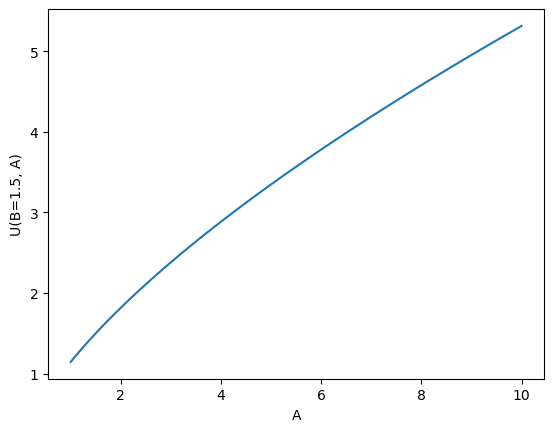

In [9]:
def U(A, B, alpha=1/3):
    return B**alpha * A**(1-alpha)

fig, ax = plt.subplots()
B = 1.5
A = np.linspace(1, 10, 100)
ax.plot(A, U(A, B))
ax.set_xlabel("A")
ax.set_ylabel("U(B=1.5, A)")

We note that

- $ U(B,1) $ is always higher with more B.

**Question 2.1: What does consuming more bananas result in?**
1. Positive Marginal Utility, that is $\frac{d U(B,1)}{d B} > 0$.

2. Negative Marginal Utility, that is $\frac{d U(B,1)}{d B} > 0$.

3. Positive Marginal Utility, that is $\frac{d U(B,1)}{d B} < 0$.

4. Neutral Marginal Utility, that is $\frac{d U(B,1)}{d B} < 0$.

In [10]:
q2_1 = 1

In [11]:
grader.check("q2_1")

q2_1 results: All test cases passed!

**Question 2.2: What does consuming more bananas result in?**
1. No change in marginal utility, i.e. $\frac{d^2 U(B,1)}{d B^2} = 0$.  

2. Larger change in marginal utility, i.e. $\frac{d^2 U(B,1)}{d B^2} > 0$.  

3. Smaller change in marginal utility, i.e. $\frac{d^2 U(B,1)}{d B^2} < 0$. 

4. Same change in marginal utility, i.e. $\frac{d^2 U(B,1)}{d B^2} = 0$.  

In [12]:
q2_2 = 3

In [13]:
grader.check("q2_2")

q2_2 results: All test cases passed!


If we plot both the $ B $ and the $ A $, we can see how the utility changes with different
bundles.

Text(0.5, 1.0, 'U(A,B)')

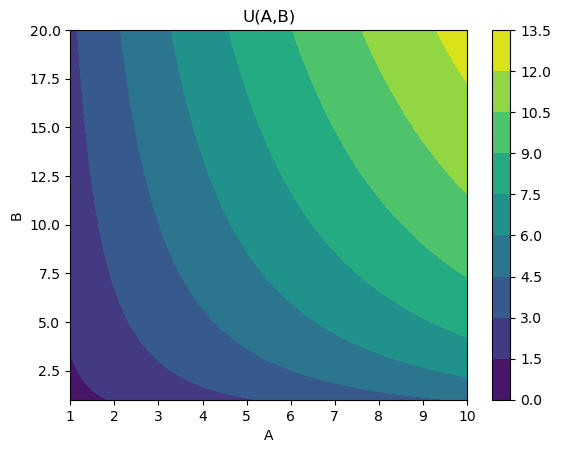

In [14]:
fig, ax = plt.subplots()
B = np.linspace(1, 20, 100).reshape((100, 1))
contours = ax.contourf(A, B.flatten(), U(A, B))
fig.colorbar(contours)
ax.set_xlabel("A")
ax.set_ylabel("B")
ax.set_title("U(A,B)")

We can find the bundles between which the consumer would be indifferent by fixing a
utility $\bar{U}$ and by determining all combinations of $A$ and $B$ where
$\bar{U} = U(B, A)$.

In this example, we can implement this calculation by letting $B$ be the variable on the
x-axis and solving for $A(\bar{U}, B)$

$$
A(B, \bar{U}) = U^{\frac{1}{1-\alpha}}B^{\frac{-\alpha}{1-\alpha}}
$$

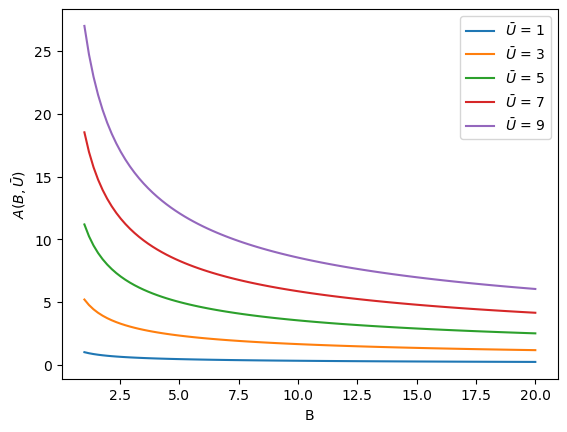

In [15]:
def A_indifference(B, ubar, alpha=1/3):
    return ubar**(1/(1-alpha)) * B**(-alpha/(1-alpha))

def plot_indifference_curves(ax, alpha=1/3):
    ubar = np.arange(1, 11, 2)
    ax.plot(B, A_indifference(B, ubar, alpha))
    ax.legend([r"$\bar{U}$" + " = {}".format(i) for i in ubar])
    ax.set_xlabel("B")
    ax.set_ylabel(r"$A(B, \bar{U}$)")

fig, ax = plt.subplots()
plot_indifference_curves(ax)

**Question 2.3: What do you notice happens as we increase either the number of apples or bananas (holding the other fixed) in terms of the indifference curves?**

As we increase the number of apples or bananas holding the other constant, you would get to a higher indifference curve and that would reflect higher levels of utility for greater quantities of goods.

**Question 2.4: Let's imagine a hypothetical world without scarcity or budgets! What would consumption look like?**
1. Individuals would consume at a reasonably low number of both to maximize their utility.
2. Individuals would consume at an arbitrarily high number of both to maximize their utility.
3. Individuals would consume an arbitrarily high number of bananas to maximize their utility.
4. Individuals would consume an arbitrarily high number of apples to maximize their utility.

In [16]:
q2_4 = 2

In [17]:
grader.check("q2_4")

q2_4 results: All test cases passed!

#### Consider the utility function $$u(x1, x2) = x1 + x2$$

**Question 2.5: What is the marginal utility function with respect to $x1$? Make sure to write out the expressions as LaTeX formulas.**

$$
\frac{\partial u(x1,x2)}{\partial x1}=\frac{\partial x1}{\partial x1} + \frac{\partial x2}{\partial x1}=1+0=1
$$

**Question 2.6: What is the marginal utility function with respect to $x2$? Make sure to write out the expressions as LaTeX formulas.**

$$
\frac{\partial u(x1,x2)}{\partial x2}=\frac{\partial x1}{\partial x2} + \frac{\partial x2}{\partial x2}=0+1=1
$$

**Question 2.7: Given your results in 2.5 and 2.6, what is significant about this utility function? What does this tell us about the marginal utility?**

Both marginal utilities w.r.t both $x_1$ and $x_2$ are constant and equal, this implies that the utility function for both are linear. This means that each additional utility gained from consuming one more unit of $x_1$ or $x_2$ does not depend on how much of the other good is consumed i.e. the two goods are perfect substitutes. It also means that the utility function will always increase by 1 regardless of how much we have already. 

## Part 3: Budget Constraints

While the above example plots consumer preferences, it says nothing about what the consumers can afford.

The simplest sort of constraint is a budget constraint where bananas and apples both have a price
and the consumer has a limited amount of funds.

If the prices per banana and per apple are identical, no matter how many you consume, then the
affordable bundles are simply all pairs of apples and bananas below the line.
$ p_a A + p_b B \leq W $.

For example, if consumer has a budget of $ W $, the price of apples is $ p_A = 2 $ dollars per
apple, and the price of bananas is normalized to be $ p_B = 1 $ dollar per banana, then the consumer
can afford anything below the line.

$$
2 A + B \leq W
$$

Or, letting $ W = 20 $ and plotting

<Axes: xlabel='B', ylabel='A'>

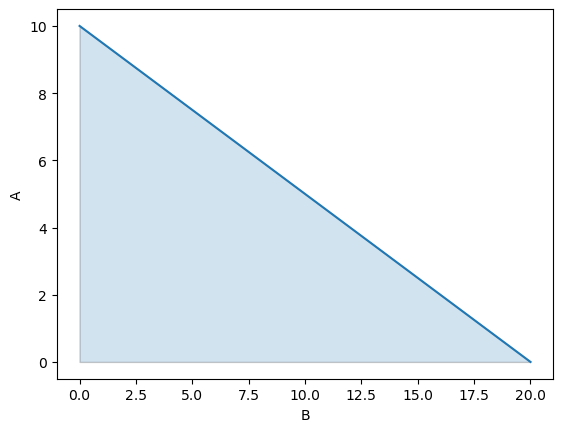

In [18]:
def A_bc(B, W=20, pa=2):
    "Given B, W, and pa return the max amount of A our consumer can afford"
    return (W - B) / pa

def plot_budget_constraint(ax, W=20, pa=2):
    B_bc = np.array([0, W])
    A = A_bc(B_bc, W, pa)
    ax.plot(B_bc, A)
    ax.fill_between(B_bc, 0, A, alpha=0.2)
    ax.set_xlabel("B")
    ax.set_ylabel("A")
    return ax

fig, ax = plt.subplots()
plot_budget_constraint(ax, 20, 2)

While the consumer can afford any of the bundles in that area, most will not be optimal.

#### Optimal Choice

Putting the budget constraints and the utility functions together lets us visualize the optimal
decision of a consumer. We want to choose the bundle with the highest possible indifference curve within its
budget set.

<Axes: xlabel='B', ylabel='A'>

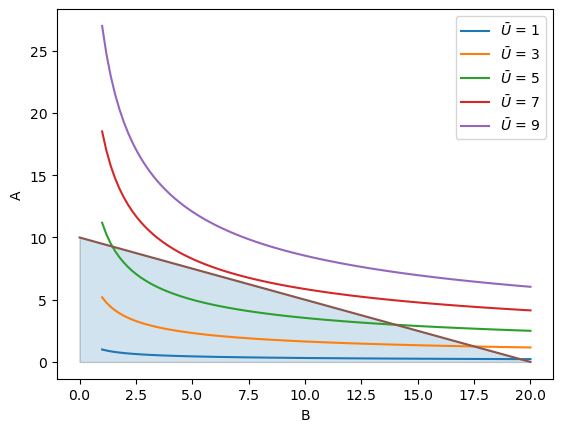

In [19]:
fig, ax = plt.subplots()
plot_indifference_curves(ax)
plot_budget_constraint(ax)

We have several ways to find the particular point $ A, B $ of maximum utility, such as
finding the point where the indifference curve and the budget constraint have the same slope, but a
simple approach is to just solve the direct maximization problem.

$$
\begin{aligned}
\max_{A, B} & B^{\alpha}A^{1-\alpha}\\
\text{s.t. } & p_A A + B \leq W
\end{aligned}
$$

Solving this problem directly requires solving a multi-dimensional constrained optimization problem,
where scipy [https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html#constrained-minimization-of-multivariate-scalar-functions-minimize](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html#constrained-minimization-of-multivariate-scalar-functions-minimize)
has several options.

For this particular problem, we notice two things: (1) The utility function is increasing in both
$ A $ and $ B $, and (2) there are only 2 goods.

This allows us 1) to assume that the budget constraint holds at equality, $ p_a A + B = W $, 2) to
form a new function $ A(B) = (W - B) / p_a $ by rearranging the budget constraint at equality, and
3) to substitute that function directly to form:

$$
\max_{B}  B^{\alpha}A(B)^{1-\alpha}
$$

Compared to before, this problem has been turned into an unconstrained univariate optimization
problem.

To implement this in code, notice that the $ A(B) $ function is what we defined before
as `A_bc`.

We will solve this by using the function `scipy.optimize.minimize_scalar`, which takes a function
`f(x)` and returns the value of `x` that minimizes `f`.

Note that you don't need to understand what this does exactly as it is out of scope. We just wanted to expose you to a cool way to find the optimal choice!

In [20]:
from scipy.optimize import minimize_scalar

def objective(B, W=20, pa=2):
    """
    Return value of -U for a given B, when we consume as much A as possible

    Note that we return -U because scipy wants to minimize functions,
    and the value of B that minimizes -U will maximize U
    """
    A = A_bc(B, W, pa)
    return -U(A, B)

result = minimize_scalar(objective)
optimal_B = result.x
optimal_A = A_bc(optimal_B, 20, 2)
optimal_U = U(optimal_A, optimal_B)

print("The optimal U is ", optimal_U)
print("and was found at (A,B) =", (optimal_A, optimal_B))

The optimal U is  6.66666666667
and was found at (A,B) = (6.6666666306519584, 6.6666667386960832)


This allows us to do experiments, such as examining how consumption patterns change as prices or
wealth levels change. Let's get back to simpler calculations!

#### Say Eric has an income of \\$24 and he can buy either vegemite, which costs \\$4, or boomerangs, which cost \\$8.

**Question 3.1:** What is Eric’s budget constraint? Make sure to use LaTeX.

$$
4x_1+8x_2 \leq 24
$$

**Question 3.2:** Can Eric afford to buy 1 boomerang and 2 vegemite? Show with a calculation.

$$
\begin{aligned}
4x_1+8x_2 & \leq 24 \\
4(2)+8(1) & = 16 \leq24 
\end{aligned}
$$
Yes, he would be able to afford to buy 1 boomerang and 2 vegemite. 

**Question 3.3:** What about 1 boomerang and 4 vegemite? Show with a calculation.

$$
\begin{aligned}
4x_1+8x_2 & \leq 24 \\
4(4)+8(1) & = 24 \leq24 
\end{aligned}
$$
Yes, he would be able to afford to buy 1 boomerang and 4 vegemite. 

**Question 3.4:** What about 2 boomerangs and 4 vegemite? Show with a calculation.

$$
\begin{aligned}
4x_1+8x_2 & \leq 24 \\
4(4)+8(2) & = 32 \nleq 24
\end{aligned}
$$
No, he would not be able to afford to buy 2 boomerangs and 4 vegemite. 

**Question 3.5:** Which consumption bundle would Eric choose and why?

Eric would most likeley choose 1 boomerang and 4 vegemites, as this bundle maximizes his consumption without exceeding his budget. However, other factors like him wanting to live a frugal life could also lead to other choices. 

**Question 3.6:** Let's say that the price of vegemite has now decreased to \\$3, while boomerangs remain at \\$8. If the quantity of vegemite was on the x-axis and the quantity of boomerangs was on the y-axis, what will happen to the slope, as well as the x and y-intercepts of Eric’s budget constraint?

If the price of vegemite decreases to $3, the slope of the budget constraint will change, becoming flatter. The x-intercept will increase, as he is able to afford more vegemite, while the y-intercept would not change since price of boomerangs has not changed.

**Question 3.7:** What will happen to the slope and intercepts of Eric’s budget constraint if his income increases to \\$32, while the price of vegemite and boomerangs stay the same at \\$4 and \\$8, respectively?

If his income increases to $32, the slopes of the budget constraint won't change since price ratio dosen't change, but the x and y-intercepts will increase, allowing him to afford more of both goods.

##  Part 4: Perfect Complements

Consider the utility function:

$$u(x_1, x_2) = min(x_1, x_2)$$

In other words, the function simply outputs the minimum between $x_1$ and $x_2$. Note that this function is not directly differentiable, so its marginal utility functions are not straightforward. Nonetheless, we will examine consumer utility optimization behavior.

Let's draw out the indifference curves for this utility function! You don't have to understand this code, but it's cool to see!

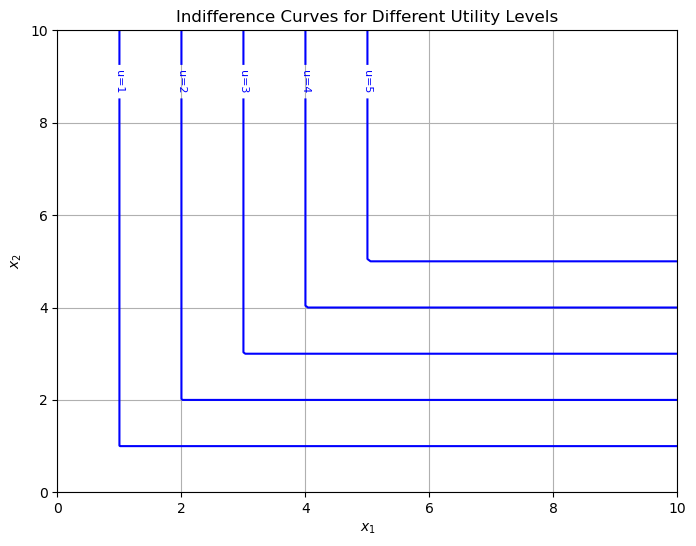

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Define the utility function
def utility_function(x1, x2):
    return np.minimum(x1, x2)

# Plot all indifference curves in one plot!
def plot_indifference_curves(utility_levels, x_range):
    x1 = np.linspace(0, x_range, 100)   
    x2 = np.linspace(0, x_range, 100)
    X1, X2 = np.meshgrid(x1, x2)
    utility = utility_function(X1, X2)

    plt.figure(figsize=(8, 6))
    
    # Just a cool way of getting the lines on one plot!
    for level in utility_levels:
        contour = plt.contour(X1, X2, utility, levels=[level], colors='blue')
        plt.clabel(contour, inline=True, fontsize=8, fmt=f'u={level}')
    
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.title('Indifference Curves for Different Utility Levels')
    plt.grid(True)
    plt.show()

# Define the range for x1 and x2
x_range = 10

# Specify the utility levels we want to plot!
utility_levels = [1, 2, 3, 4, 5]

plot_indifference_curves(utility_levels, x_range)

**Question 4.1:** What do you notice about the indifference curves for this utility function? Note that there is no correct answer here!

The indifference curves for this utility function appear as right angles, indicating that the goods are perfect complements and must be consumed in fixed proportions to provide utility.

**Question 4.2:** Assume that $x_1$ and $x_2$ have the same price, and you have the ability to purchase one more unit of $x_1$ or $x_2$. If you currently consume 5 units $x_1$ and 3 units of $x_2$, which good would you purchase? Why?

You would purchase more of $x_2$ since the utility function is defined as $min(x_1, x_2)$ and so consuming more of $x_2$ would increase his overall utility. 

**Question 4.3:** Why is this function known as the perfect complements function? (hint: https://en.wikipedia.org/wiki/Complementary_good)

It is called the perfect complements function since it reflects goods that are always consumed together in fixed proportions. Increasing one good without increasing the other does not improve utility.

Let's now add a budget constraint to the same plot assuming that $x_1$ and $x_2$ have the same price.

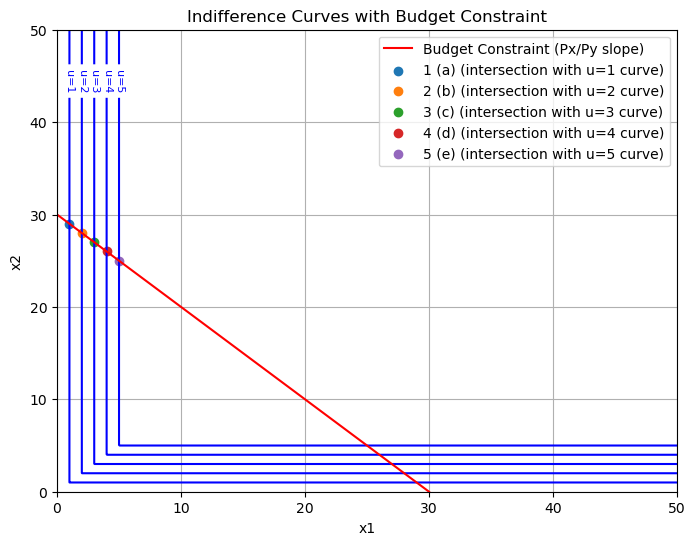

In [22]:

def utility_function(x1, x2):
    return np.minimum(x1, x2)

def plot_budget_constraint(price_x, price_y, budget):
    x_budget = np.linspace(0, budget / price_x, 100)
    y_budget = (budget - price_x * x_budget) / price_y
    plt.plot(x_budget, y_budget, label=f'Budget Constraint (Px/Py slope)', color='r', linestyle='-')

def find_intersection_points(utility_levels, price_x, price_y, budget):
    intersection_points = {}

    for level in utility_levels:
        x = np.linspace(0, budget / price_x, 1000)
        y = (budget - price_x * x) / price_y
        min_u = np.minimum(x, y)
        intersection_x = []
        intersection_y = []

        for i in range(1, len(min_u)):
            if min_u[i - 1] < level and min_u[i] >= level:
                t = (level - min_u[i - 1]) / (min_u[i] - min_u[i - 1])
                intersection_x.append(x[i - 1] + t * (x[i] - x[i - 1]))
                intersection_y.append(y[i - 1] + t * (y[i] - y[i - 1]))

        intersection_points[f'u={level}'] = (intersection_x, intersection_y)

    return intersection_points

def plot_indifference_curves(utility_levels, x_range, price_x, price_y, budget):
    x1 = np.linspace(0, x_range, 100)
    x2 = np.linspace(0, x_range, 100)
    X1, X2 = np.meshgrid(x1, x2)
    utility = utility_function(X1, X2)

    plt.figure(figsize=(8, 6))
    
    for level in utility_levels:
        contour = plt.contour(X1, X2, utility, levels=[level], colors='b')
        plt.clabel(contour, inline=True, fontsize=8, fmt=f'u={level}')

    plot_budget_constraint(price_x, price_y, budget)

    intersection_points = find_intersection_points(utility_levels, price_x, price_y, budget)
    labels = iter('abcdefghijklmnopqrstuvwxyz') 
    for label, (x_points, y_points) in intersection_points.items():
        label = label.replace('u=', '')
        for x, y in zip(x_points, y_points):
            point_label = next(labels)
            plt.scatter(x, y, label=f'{label} ({point_label}) (intersection with u={label} curve)', marker='o')

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Indifference Curves with Budget Constraint')
    plt.legend()
    plt.grid(True)
    plt.show()

x_range = 50
utility_levels = [1, 2, 3, 4, 5]
budget = 30
price_x = 1
price_y = 1

plot_indifference_curves(utility_levels, x_range, price_x, price_y, budget)

**Question 4.4:** At which point(s) on the plot above is utility maximized?

at point E, the intersection with the u=5 curve

**Question 4.5:** More generally speaking (without considering the plot above), at which point on the indifference curve will individuals typically tend to choose as their optimal consumption bundle? Why?

Individuals typically choose the point where the indifference curve is tangent to the budget constraint, as this point maximizes utility given their budget. However, tangent's with right-angle curves are at the corners.

That's all! You just completed utility and LaTeX bootcamp!

We would like to thank Chase Coleman, Spencer Lyon, Jesse Perla, and other contributors for their work towards the "Introduction to Economic Modeling and Data Science" notebook via QuantEcon. This work was supported in part by the Center for Innovative Data in Economics Research (CIDER) at the Vancouver School of Economics, UBC, funded by the Canada Excellence Research Chair grant: https://datascience.quantecon.org

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [23]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)

Running your submission against local test cases...



Your submission received the following results when run against available test cases:

    q2_1 results: All test cases passed!

    q2_2 results: All test cases passed!

    q2_4 results: All test cases passed!
